<a href="https://colab.research.google.com/github/vnshanmukh/Local-Data-For-Better-Health/blob/main/Ait_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Local data for better Health

* This project aims to visualize the public health data from 500 cities in the US. We attempt to understand the most demanding public health problem so as to better inform the public, medical practitioners as well as policy makers.

## Importing required Libraries

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,requests,io,zipfile

In [ ]:
dfRawData = pd.read_csv('/content/drive/MyDrive/Datasets/PLACES__Local_Data_for_Better_Health__County_Data_2021_release.csv', low_memory = False)

In [ ]:
dfRawData.shape

(187656, 21)

# Data Cleaning

We have an empty columns Data_Value_Footnote_Symbol and Data_Value_Footnote, also we do not need Datasource column. So we are dropping these 3 columns from dataframe.

In [ ]:
df_clean = dfRawData.drop(['DataSource','Data_Value_Footnote_Symbol','Data_Value_Footnote'],axis =1)

In [ ]:
df_clean.shape

(187656, 18)

As we can see 21 columns are changed to 18 columns.

In [ ]:
# copy of dataframe
df = df_clean.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187656 entries, 0 to 187655
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   187656 non-null  int64  
 1   StateAbbr              187656 non-null  object 
 2   StateDesc              187656 non-null  object 
 3   LocationName           187596 non-null  object 
 4   Category               187656 non-null  object 
 5   Measure                187656 non-null  object 
 6   Data_Value_Unit        187656 non-null  object 
 7   Data_Value_Type        187656 non-null  object 
 8   Data_Value             187656 non-null  float64
 9   Low_Confidence_Limit   187656 non-null  float64
 10  High_Confidence_Limit  187656 non-null  float64
 11  TotalPopulation        187656 non-null  object 
 12  LocationID             187656 non-null  int64  
 13  CategoryID             187656 non-null  object 
 14  MeasureId              187656 non-nu

In [ ]:
df.isnull().any()

Year                     False
StateAbbr                False
StateDesc                False
LocationName              True
Category                 False
Measure                  False
Data_Value_Unit          False
Data_Value_Type          False
Data_Value               False
Low_Confidence_Limit     False
High_Confidence_Limit    False
TotalPopulation          False
LocationID               False
CategoryID               False
MeasureId                False
DataValueTypeID          False
Short_Question_Text      False
Geolocation               True
dtype: bool

In [ ]:
df.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,187656.000000,187656.000000,187656.000000,187656.000000,187656.000000
mean,2018.732020,31.724481,29.748927,33.756836,30356.043484
std,0.442908,24.828821,24.479171,25.216044,15202.499969
min,2018.000000,1.800000,1.600000,2.000000,59.000000
25%,2018.000000,12.600000,10.800000,14.100000,18167.000000
50%,2019.000000,23.800000,20.700000,26.800000,29159.000000
75%,2019.000000,40.800000,39.100000,43.600000,45089.000000
max,2019.000000,93.200000,92.600000,93.700000,56045.000000


# Unique measures

In [ ]:
df.Measure.unique()

array(['Arthritis among adults aged >=18 years',
       'Obesity among adults aged >=18 years',
       'Mammography use among women aged 50-74 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Stroke among adults aged >=18 years',
       'Depression among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'All teeth lost among adults aged >=65 years',
       'Current lack of health insurance among adults aged 18-64 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'No leisure-time physical activity among adults aged >=18 years',
       'Current smoking among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 year

# Seprating the dataset on differnet Measures

In [ ]:
arthritis = df[df.Measure == 'Arthritis among adults aged >=18 years']
obesity = df[df.Measure == 'Obesity among adults aged >=18 years']
mammography = df[df.Measure == 'Mammography use among women aged 50-74 years']
diabetes = df[df.Measure == 'Diagnosed diabetes among adults aged >=18 years']
stroke = df[df.Measure == 'Stroke among adults aged >=18 years']
depression = df[df.Measure == 'Depression among adults aged >=18 years']
currentasthma = df[df.Measure == 'Current asthma among adults aged >=18 years']
bingedrinking =  df[df.Measure == 'Binge drinking among adults aged >=18 years']
teethlost = df[df.Measure == 'All teeth lost among adults aged >=65 years']
lackofhealthinsurance = df[df.Measure == 'Current lack of health insurance among adults aged 18-64 years']
corepreventiveservicesforoldmen= df[df.Measure == 'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening']
Physicalinactivity = df[df.Measure == 'No leisure-time physical activity among adults aged >=18 years']
currentsmoking = df[df.Measure == 'Current smoking among adults aged >=18 years']
physicalhealth = df[df.Measure == 'Physical health not good for >=14 days among adults aged >=18 years']
takingbpmedication = df[df.Measure == 'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressur']
colorectalcancerscreening = df[df.Measure == 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years']
coronaryheartdiease = df[df.Measure == 'Coronary heart disease among adults aged >=18 years']
sleeplessthan7 = df[df.Measure == 'Sleeping less than 7 hours among adults aged >=18 years']
annualcheckup = df[df.Measure == 'Visits to doctor for routine checkup within the past year among adults aged >=18 years']
corepreventiveservicesforoldwomen = df[df.Measure == 'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years']
generalhealth = df[df.Measure == 'Fair or poor self-rated health status among adults aged >=18 years']
cholesterolscreening = df[df.Measure == 'Cholesterol screening among adults aged >=18 years']
mentalhealth = df[df.Measure == 'Mental health not good for >=14 days among adults aged >=18 years']
dentalvisit = df[df.Measure == 'Visits to dentist or dental clinic among adults aged >=18 years']
cancer = df[df.Measure == 'Cancer (excluding skin cancer) among adults aged >=18 years']
chronicobstructivepulmonary = df[df.Measure == 'Chronic obstructive pulmonary disease among adults aged >=18 years']
highbloodpressure = df[df.Measure == 'High blood pressure among adults aged >=18 years']
chronickidney = df[df.Measure == 'Chronic kidney disease among adults aged >=18 years']
highcholesterol = df[df.Measure == 'High cholesterol among adults aged >=18 years who have been screened in the past 5 years']
cervicalcancer = df[df.Measure == 'Cervical cancer screening among adult women aged 21-65 year']

# Analysis

# what is the distribution of data of year ?

Text(0.5, 1.0, 'distribution of data of year')

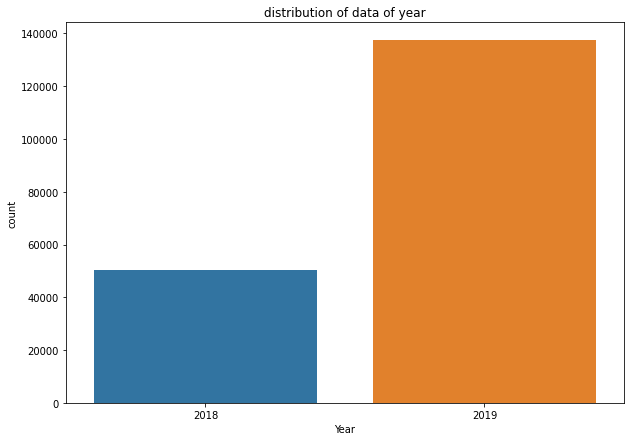

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(x='Year',data=df)
plt.title("distribution of data of year")

* From above graph we can see that the data has been distributed between 2018 and 2019

## What is the distribution of Category in 2018 and 2019?

Text(0.5, 1.0, 'distribution in 2019')

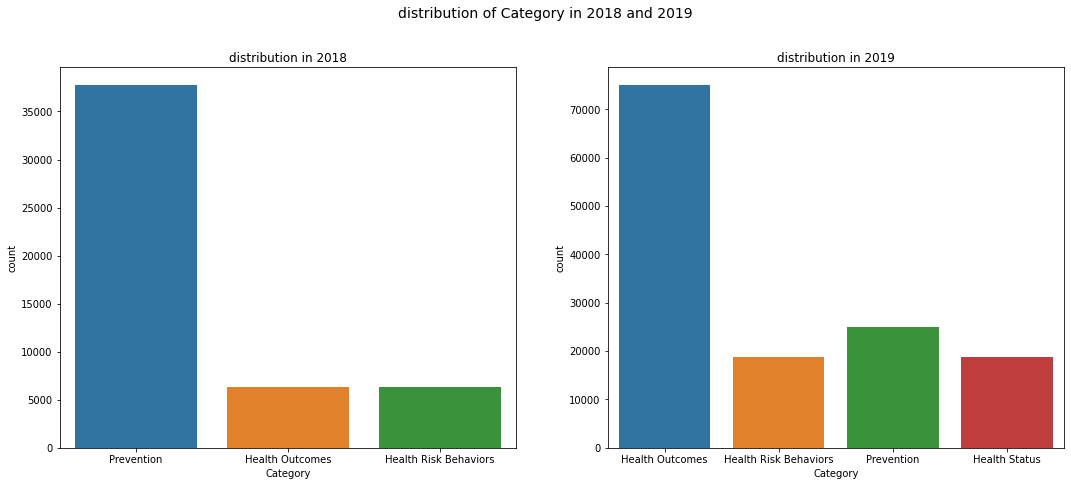

In [ ]:
df_2018 =df[df.Year == 2018] # data with 2018 year
df_2019 = df[df.Year ==2019] # data with 2019 Year

plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
ax = sns.countplot(x='Category',data=df_2018)
plt.suptitle('distribution of Category in 2018 and 2019',
            x = 0.5, y = 1, fontsize = 14)
plt.title("distribution in 2018")
plt.subplot(1,2,2)
ax = sns.countplot(x='Category',data=df_2019)
plt.title("distribution in 2019")

* From above graph in 2018 we can see that the data has been distributes among categories 
  - Health outcomes
  - Prevention
  - Health Risk behaviours 
* From above graph in 2019 we can see that the data has been distributes among categories 
  - Health outcomes
  - Prevention
  - Health Risk behaviours
  - Health Status

## What is the distribution of Data_value of Health outcomes,Risk behaviours,Prevention, Health Status?

Text(0.5, 1.0, 'highcholesterol')

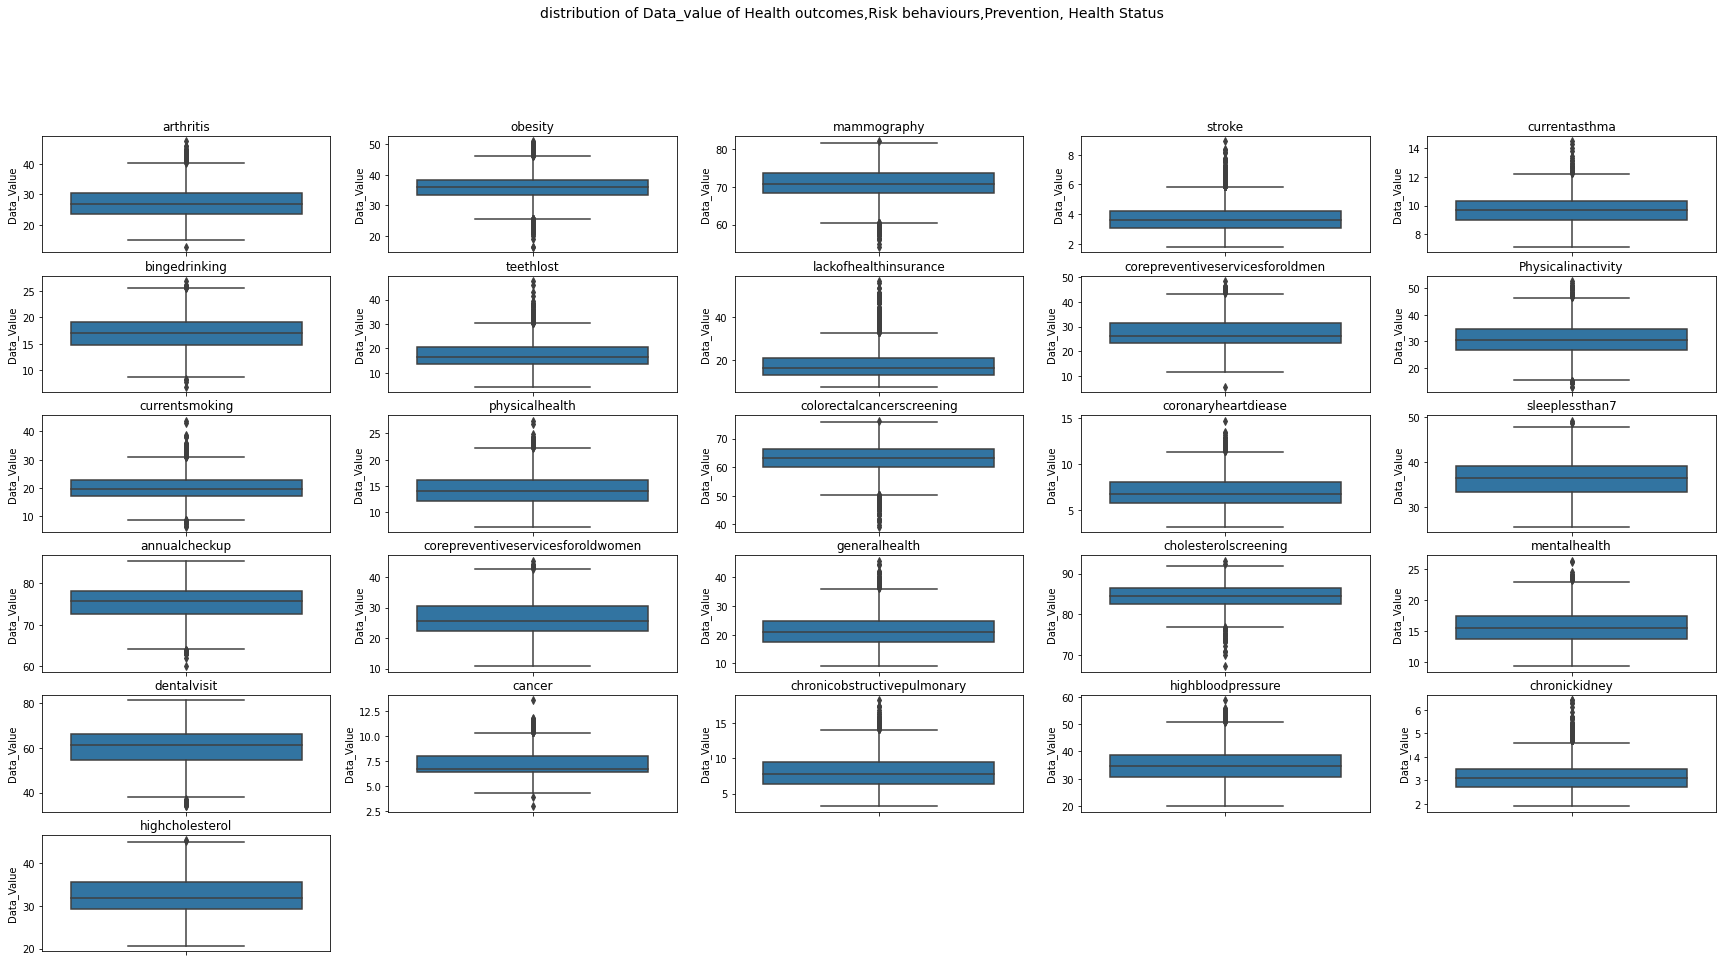

In [ ]:
plt.figure(figsize = (30,15))
plt.subplot(6,5,1)
plt.suptitle('distribution of Data_value of Health outcomes,Risk behaviours,Prevention, Health Status',
            x = 0.5, y = 1, fontsize = 14)

ax = sns.boxplot(y='Data_Value',data=arthritis)
plt.title('arthritis')
plt.subplot(6,5,2)
ax = sns.boxplot(y='Data_Value',data=obesity)
plt.title('obesity')
plt.subplot(6,5,3)
ax = sns.boxplot(y='Data_Value',data=mammography)
plt.title('mammography')
plt.subplot(6,5,4)
ax = sns.boxplot(y='Data_Value',data=stroke)
plt.title('stroke')
plt.subplot(6,5,5)
ax = sns.boxplot(y='Data_Value',data=currentasthma)
plt.title('currentasthma')
plt.subplot(6,5,6)
ax = sns.boxplot(y='Data_Value',data=bingedrinking)
plt.title('bingedrinking')
plt.subplot(6,5,7)
ax = sns.boxplot(y='Data_Value',data=teethlost)
plt.title('teethlost')
plt.subplot(6,5,8)
plt.title('arthritis')
ax = sns.boxplot(y='Data_Value',data=lackofhealthinsurance)
plt.title('lackofhealthinsurance')
plt.subplot(6,5,9)
ax = sns.boxplot(y='Data_Value',data=corepreventiveservicesforoldmen)
plt.title('corepreventiveservicesforoldmen')
plt.subplot(6,5,10)
ax = sns.boxplot(y='Data_Value',data=Physicalinactivity)
plt.title('Physicalinactivity')
plt.subplot(6,5,11)
ax = sns.boxplot(y='Data_Value',data=currentsmoking)
plt.title('currentsmoking')
plt.subplot(6,5,12)
ax = sns.boxplot(y='Data_Value',data=physicalhealth)
plt.title('physicalhealth')
plt.subplot(6,5,13)
ax = sns.boxplot(y='Data_Value',data=colorectalcancerscreening)
plt.title('colorectalcancerscreening')
plt.subplot(6,5,14)
ax = sns.boxplot(y='Data_Value',data=coronaryheartdiease)
plt.title('coronaryheartdiease')
plt.subplot(6,5,15)
ax = sns.boxplot(y='Data_Value',data=sleeplessthan7)
plt.title('sleeplessthan7')
plt.subplot(6,5,16)
ax = sns.boxplot(y='Data_Value',data=annualcheckup)
plt.title('annualcheckup')
plt.subplot(6,5,17)
ax = sns.boxplot(y='Data_Value',data=corepreventiveservicesforoldwomen)
plt.title('corepreventiveservicesforoldwomen')
plt.subplot(6,5,18)
ax = sns.boxplot(y='Data_Value',data=generalhealth)
plt.title('generalhealth')
plt.subplot(6,5,19)
ax = sns.boxplot(y='Data_Value',data=cholesterolscreening)
plt.title('cholesterolscreening')
plt.subplot(6,5,20)
ax = sns.boxplot(y='Data_Value',data=mentalhealth)
plt.title('mentalhealth')
plt.subplot(6,5,21)
ax = sns.boxplot(y='Data_Value',data=dentalvisit)
plt.title('dentalvisit')
plt.subplot(6,5,22)
ax = sns.boxplot(y='Data_Value',data=cancer)
plt.title('cancer')
plt.subplot(6,5,23)
ax = sns.boxplot(y='Data_Value',data=chronicobstructivepulmonary)
plt.title('chronicobstructivepulmonary')
plt.subplot(6,5,24)
ax = sns.boxplot(y='Data_Value',data=highbloodpressure)
plt.title('highbloodpressure')
plt.subplot(6,5,25)
ax = sns.boxplot(y='Data_Value',data=chronickidney)
plt.title('chronickidney')
plt.subplot(6,5,26)
ax = sns.boxplot(y='Data_Value',data=highcholesterol)
plt.title('highcholesterol')


## Reelation between Data value and location ID ?



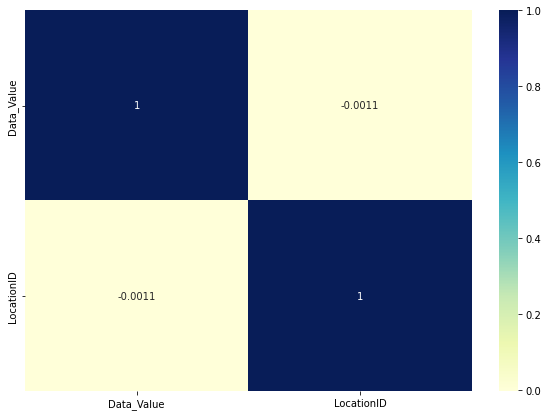

In [ ]:
plt.figure(figsize = (10,7))
a = df[['Data_Value','LocationID']]
sns.heatmap(a.corr(), annot = True, cmap = 'YlGnBu')

* It can be observed that Data value rate has a weak negative correlation with average Location.

## what is the most common health outcome ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


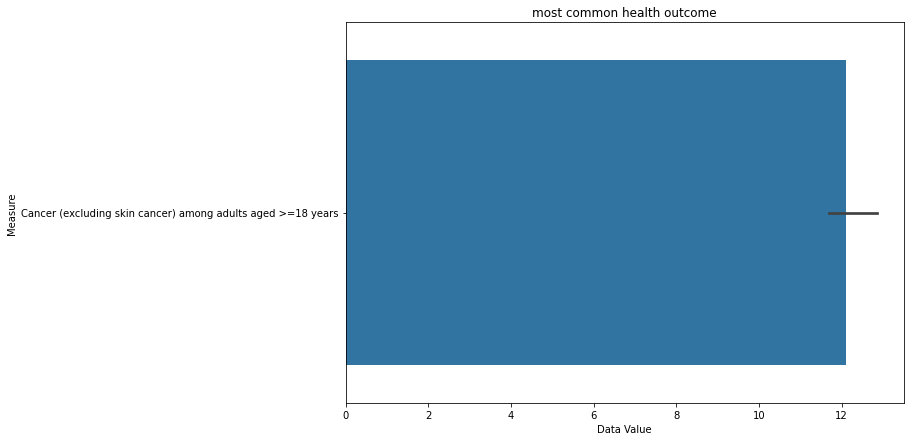

In [ ]:
plt.figure(figsize = (10,7))
a = df[df.Category == 'Health Outcomes']
x = list(cancer.nlargest(5, 'Data_Value')['Data_Value'])
y = list(cancer.nlargest(5, 'Data_Value')['Measure']) 
sns.barplot(x,y)
plt.title('most common health outcome')
plt.ylabel('Measure')
plt.xlabel('Data Value');

* From above graph we can notice that measure 'Cancer (excluding skin cancer) among adults aged >=18 years' is the most common health outcome.

## Which Cities has Highest Data value for most common health outcome?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


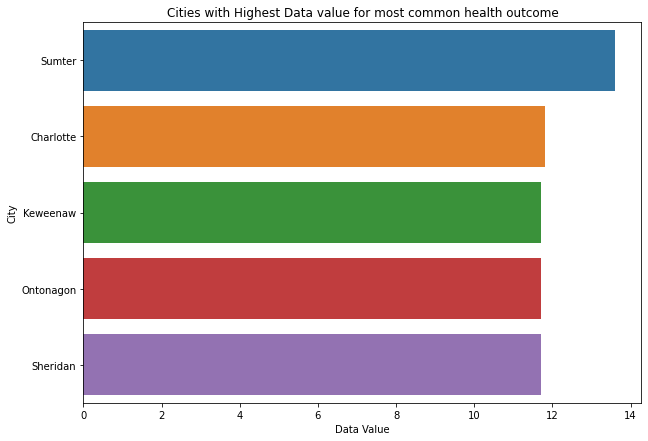

In [ ]:
plt.figure(figsize = (10,7))
x = list(cancer.nlargest(5, 'Data_Value')['Data_Value']) 
y = list(cancer.nlargest(5, 'Data_Value')['LocationName']) 
sns.barplot(x,y)
plt.title('Cities with Highest Data value for most common health outcome')
plt.ylabel('City')
plt.xlabel('Data Value');

* Above graph shows that Sumter city has highest Data Value follwed by Charlotte, Keweensaw.
* This finding can be used by the medical team to start new cancer treatment facilities in these cities.

## Which cities has less number of health insurances ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


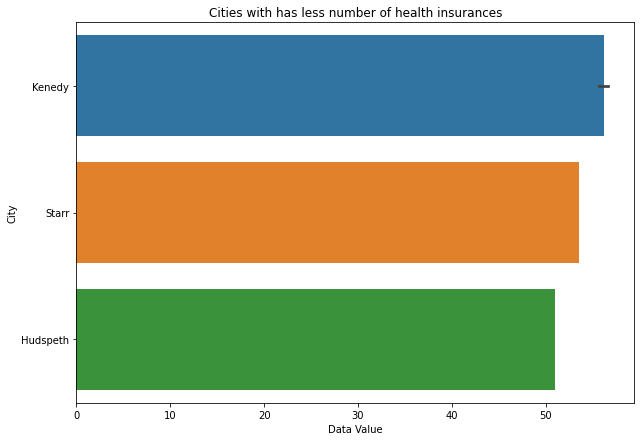

In [ ]:
plt.figure(figsize = (10,7))
x = list(lackofhealthinsurance.nlargest(5, 'Data_Value')['Data_Value']) 
y = list(lackofhealthinsurance.nlargest(5, 'Data_Value')['LocationName']) 
sns.barplot(x,y)
plt.title('Cities with has less number of health insurances')
plt.ylabel('City')
plt.xlabel('Data Value');

* Kenedy city population lack the health insurance who aged greater than 18.
* This can be used by the insurance organizations for to do their marketing and let them know the importance of the health insurance.


## what is the relation between mental health and physical health?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between mentalhealth value and pysical health value')

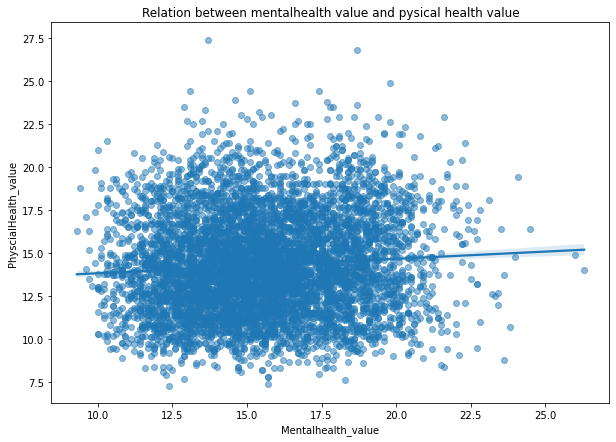

In [46]:
plt.figure(figsize = (10,7))
sns.regplot(mentalhealth['Data_Value'],physicalhealth['Data_Value'],scatter_kws = {'alpha':1/2})

plt.xlabel("Mentalhealth_value")
plt.ylabel("PhyscialHealth_value")
plt.title("Relation between mentalhealth value and pysical health value")

* we can see that the mentalhealth value and physical health value have same impact on each other.
* Low mentalhealth value has low physical health value, same with high mental health value has high physical health value.


## Limitations
* Some states such as California and Texas have way more participating locations than other states such as Alaska or North Dakota, this put the serious limitation on answering the question which cities has less number insurance aged above 18 years.
* Cnacer measure is based on being diagnosed by a physician and respondent recall of the diagnosis and might underestimate the true prevalence.

## References
* https://www.researchgate.net/publication/317584962_500_Cities_Project_Local_Data_for_Better_Health
* https://chronicdata.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb
* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://matplotlib.org/